<a href="https://colab.research.google.com/github/LAHROURI/MNIST-CNN-Classification/blob/main/CNN_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Projet Deep learning </h1></center>
<center><h2> Classification de Chiffres Manuscrits avec Réseaux de Neurones Convolutifs
(CNN) sur le jeu de données MNIST</h2></center>

# **Etape 1 : Prise en main du jeu MNIST**

Le jeu de données MNIST, composé de 60 000
images d'entraînement et 10 000 images de test, sera utilisé pour former et évaluer les modèles.

In [ ]:
#installation du framework TensorFlow
! pip install tensorflow

In [ ]:
#importation des bibliothèques necessaires
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten,Dense,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 1. Chargement des données MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


test : 10000
train : 60000


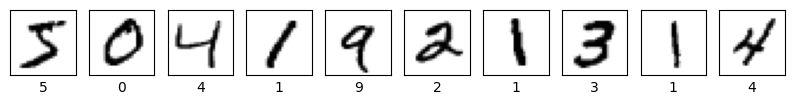

In [ ]:
# Taille du jeu de données de test
test_data_size = test_images.shape[0]
print("test :" ,test_data_size )
# Taille du jeu de données d'entraînement
train_data_size = train_images.shape[0]
print("train :", train_data_size )

#visualisation de 10 images grayscale
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# **Etape 2 : Pretraitement des données**

**1- Création de l'ensemble du test :**Comme première étape de prétraitement, la création de l'ensemble du test est importante pour l'évaluation de notre modèle, mais pour cette dataset MNIST elle n'est pas necessaire, car la dataset est déja prédivisé en partie test et partie train.

**2 - Redimensionnement de la dataset** : comme 2ème phase de prétraitement on , doit s'assurer que toutes les images de la datset on la même dimension :
ici la taille est 28 x 28

In [ ]:
# premièrement : Obtenir les tailles des images dans le jeu de données MNIST
heights = [img.shape[0] for img in train_images]
widths = [img.shape[1] for img in train_images]

# deuxièment : Affichez les dimensions typiques des images
print("Minimum image height:", min(heights))
print("Maximum image height:", max(heights))
print()
print("Minimum image widths:", min(widths))
print("Minimum image widths:", max(widths))

Minimum image height: 28
Maximum image height: 28

Minimum image widths: 28
Minimum image widths: 28


In [ ]:
# Reshaper les images pour ajouter une dimension de canal
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

 ---->  Meme si nos images ont la meme shape de 28 x 28 , mais il est
  recommandé de réaliser le redimensionnement (reshape) des images au tout début du processus de prétraitement des données.
  
  Cela permet de s'assurer que toutes les données sont dans le format correct avant de commencer toute forme d'analyse ou d'entraînement de modèle





 **1 - Normalisation des pixels de l'intervale [0,255] à [0, 1]** : même si les images téléchargées sont en grayscale ,la normalisation des pixels est toujours recommandée pour une bonne convergence d'entrainement et une bonne performance du modèle  .

In [ ]:
# 2. Normaliser les images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Affichage des étiquettes avant la conversion en one-hot encoding
print("Étiquettes d'entraînement avant one-hot encoding :")
print(train_labels[:10])

Étiquettes d'entraînement avant one-hot encoding :
[5 0 4 1 9 2 1 3 1 4]


**3- Conversion des labels en vecteurs binaires (one-hot encoding)**: il ya plusieurs méthodes de conversion , mais puisque on utilise
la biblio keras intégrée dans tensorflow , on va utiliser la fonction to_categorical qui convertit les étiquettes entières en vecteurs binaires.


In [ ]:
# One-hot encoding des étiquettes
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
# Affichage des étiquettes après la conversion en one-hot encoding
print("Étiquettes d'entraînement après one-hot encoding :")
print(train_labels[:10])

Étiquettes d'entraînement après one-hot encoding :
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Séparation de données en entrainemet, validation et test :**

In [ ]:
# Diviser les données en ensembles de train et de validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Vérifier les formes des données après la division
print("Forme de train_images après : ", train_images.shape)
print("Forme de val_images après : ", val_images.shape)


Forme de train_images après :  (48000, 28, 28, 1)
Forme de val_images après :  (12000, 28, 28, 1)


## **Pourquoi cette séparation est-elle importante ?**

1. **Évaluation correcte du modèle** :Séparer les ensembles de données permet d'évaluer correctement la performance du modèle sur des données non vues.
2. **Réglage des hyperparamètres** : l'ensemble de validation permet de tester différentes configurations du modèle et de choisir la meilleure sans utiliser les données de test
3. **Prévention du surapprentissage (overfitting)** : l'ensemble de validation distinct permet de détecter et de prévenir le surapprentissage.





# **Etape 3 : Construction du modèle CNN**




l'utilisation de la technique d'**EarlyStopping** qui permet d’arrêter l’apprentissage dés lors que le modèle commence à faire du sur-apprentissage et économise le temps de calcul.

**patience=2** : Indique que l'entraînement sera arrêté si la perte de validation ne s'améliore pas pendant 2 époques consécutives.

**monitor='val_loss'** : Spécifie que la métrique surveillée est la perte de validation (val_loss). Le callback EarlyStopping surveillera cette métrique pour détecter les changements dans la performance du modèle sur l'ensemble de validation.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

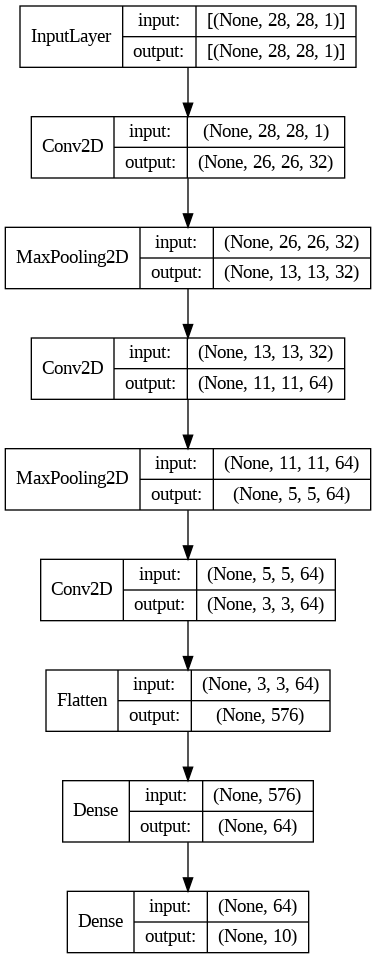

In [ ]:
model_mnist = Sequential()

model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(MaxPooling2D((2, 2)))

model_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(MaxPooling2D((2, 2)))

model_mnist.add(Conv2D(64, (3, 3), activation='relu'))

# Après deux couches de max pooling, la dimension est réduite à 3x3 pixels
#Ajouter une autre couche de max pooling après cela pourrait réduire trop fortement la dimension,
# laissant trop peu de contexte spatial pour l'apprentissage efficace.



 # Aplatir les résultats pour les envoyer dans un réseau dense
model_mnist.add(Flatten())

model_mnist.add(Dense(64, activation='relu'))

#couche dense avec une activation softmax pour la classification multiclasses
model_mnist.add(Dense(10, activation='softmax'))


# Utilisation de EarlyStopping pour éviter le surapprentissage
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


# Compilation du modèle
model_mnist.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_mnist.summary()

# Visualisation de l'architecture du modèle
plot_model(model_mnist, to_file='model_mnist.png', show_shapes=True, show_layer_names=False)

#l y a 320 paramètres entraînables dans cette couche (les poids des filtres ainsi que les biais).
# flatten : la sortie est un vecteur de longueur 576

---- > Notre modèle va devoir apprendre 93 322 paramètres , cela va prendre du temps .

# **Etape 4 : Entrainement du modèle**

In [ ]:
# Entraînement du modèle avec validation
history = model_mnist.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 46s 29ms/step - loss: 0.1641 - accuracy: 0.9483 - val_loss: 0.0630 - val_accuracy: 0.9804
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0410 - val_accuracy: 0.9876
Epoch 3/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0407 - val_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0363 - val_accuracy: 0.9894
Epoch 5/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0408 - val_accuracy: 0.9886
Epoch 6/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0382 - val_accuracy: 0.9898
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0432 -

   Performances du modèle :

    
1. **Précision finale**:
Votre modèle atteint une précision (accuracy) élevée tant sur l'ensemble d'entraînement que sur l'ensemble de validation. Cela indique que votre modèle a appris efficacement à reconnaître les chiffres manuscrits du jeu de données MNIST.

2. **Perte moyenne finale**:
Perte moyenne sur l'ensemble d'entraînement : 0.0091
Perte moyenne sur l'ensemble de validation : 0.0479   
   ---> La faible perte moyenne sur les deux ensembles de données suggère que le modèle fait des prédictions précises avec une bonne généralisation.

3. **Temps d'entraînement par époque** :
   Temps moyen par époque : Environ 45 secondes   
  ----> Le modèle a été entraîné efficacement en un temps raisonnable, ce qui indique une bonne performance de l'entraînement.

4. **Tendance de l'apprentissage** :
   La précision et la perte diminuent progressivement au fil des époques.   
 ---> Le modèle continue de s'améliorer au fil du temps, ce qui montre une convergence vers de meilleures performances sans surapprentissage évident.



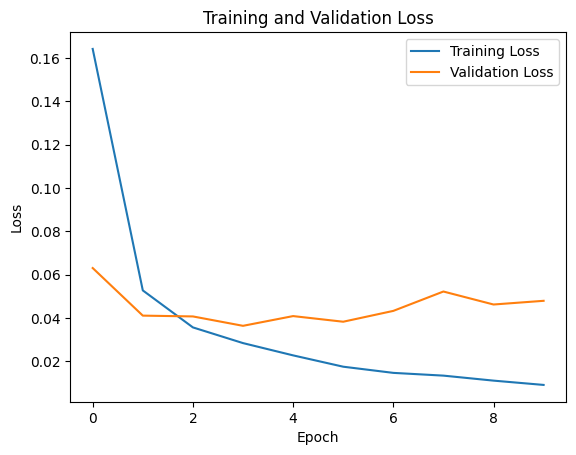

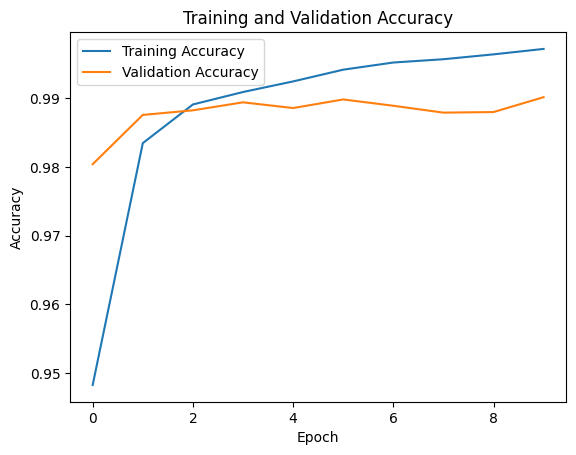

In [ ]:
# Extraction de l'historique de la perte et de la précision sur l'ensemble d'entraînement et de validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer les courbes de précision
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Etape 5 : Évaluation du modèle sur l'ensemble de test**

**1- Évaluation des performances du modèle sur l'ensemble de test :**

In [ ]:
# Évaluation du modèle
test_loss, test_accuracy = model_mnist.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_accuracy)
print('Test Loss: ',test_loss)


313/313 - 4s - loss: 0.0313 - accuracy: 0.9920 - 4s/epoch - 12ms/step
Test accuracy: 0.9919999837875366
Test Loss:  0.03133166953921318


##Analyse des résultats

1.  **Précision élevée** : Une précision de 99.20% sur les données de test indique que votre modèle généralise très bien, au moins pour cet ensemble de données.
2.  **Perte faible** : Une perte de 0.0313 montre que le modèle fait peu d'erreurs significatives.



    
   

**2 - Analyse des résultats à l'aide des mesures de performance :**  

1.   Matrice de confusion
2.   Précision
3.   Rappel
4.   F1 score


In [ ]:
# Prédictions du modèle sur l'ensemble de test
predictions = model_mnist.predict(test_images.reshape(-1, 28, 28, 1))

# Conversion des prédictions en étiquettes prédites et les étiquettes réelles
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
confusion_mtx = confusion_matrix(actual_labels, predicted_labels)
print("Matrice de confusion :")
print(confusion_mtx)

# Calculer la précision
precision = precision_score(actual_labels, predicted_labels, average='weighted')
print("Précision :", precision)

# Calculer le rappel
recall = recall_score(actual_labels, predicted_labels, average='weighted')
print("Rappel :", recall)

# Calcul du score F1
f1 = f1_score(actual_labels,predicted_labels, average='weighted')
print("Score F1 :", f1)

313/313 [==============================] - 3s 9ms/step
Matrice de confusion :
[[ 974    1    0    0    0    0    1    2    1    1]
 [   0 1133    0    0    0    0    1    0    0    1]
 [   2    1 1021    0    0    0    0    8    0    0]
 [   0    0    1 1005    0    3    0    1    0    0]
 [   0    0    1    0  979    0    0    0    0    2]
 [   0    0    0    6    0  885    1    0    0    0]
 [   1    2    0    0    2    3  944    0    6    0]
 [   0    2    5    0    1    0    0 1017    0    3]
 [   2    0    1    1    0    1    0    1  965    3]
 [   0    0    0    0    5    2    0    3    2  997]]
Précision : 0.9920070566993671
Rappel : 0.992
Score F1 : 0.9919984508686593


**Matrice de confusion :** La matrice de confusion montre le nombre de prédictions correctes et incorrectes pour chaque classe. Les valeurs diagonales représentent les prédictions correctes, tandis que les valeurs non diagonales représentent les prédictions incorrectes.

**Précision :** La précision mesure le nombre de prédictions correctes parmi toutes les prédictions faites pour une classe donnée. Une précision élevée indique un faible nombre de fausses prédictions.

**Rappel :** Le rappel mesure la proportion de vrais positifs parmi tous les exemples positifs réels. Un rappel élevé indique qu'un grand nombre de vrais positifs ont été correctement identifiés.

**Score F1 :** Le score F1 est la moyenne harmonique de la précision et du rappel. Il fournit une mesure unique de la performance du modèle qui prend en compte à la fois la précision et le rappel.

Dans ce cas, le modèle a une précision de **99,20 %**, un rappel de **99,2 %** et un score F1 de **99,20%**.

 --- > Ces valeurs indiquent que le modèle a de très bonnes performances sur l'ensemble de test.

#**Etape 6 :  Améliorations et expérimentations :**

**Techniques d' augmentation de data et de de régularisation :**

1 - **Régularisation**

 **La couche Dropout** offre une régularisation en désactivant aléatoirement une fraction des neurones pendant l'entraînement.


2 - **Augmentation des données** : L'augmentation des données consiste à appliquer des transformations aléatoires aux images d'entraînement, telles que la rotation, la translation , le zoom.

 Cela augmente la taille effective de l'ensemble de données d'entraînement, ce qui permet au modèle de voir plus de variations des données pendant l'entraînement et donc d'améliorer sa capacité à généraliser à de nouvelles données

In [ ]:
from tensorflow.keras.optimizers import Adam

# Construction du modèle CNN
model_mnist = Sequential()

# Première couche de convolution et pooling
model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(MaxPooling2D((2, 2)))


# Deuxième couche de convolution et pooling
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(MaxPooling2D((2, 2)))


# Troisième couche de convolution
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))

# Aplatissage et couche dense : On a terminé avec les filtres et le max pooling
model_mnist.add(Flatten())

#première couche dense
model_mnist.add(Dense(64, activation='relu'))

# Ajout de dropout pour la régularisation : éviter le surapprentissage du modèle
model_mnist.add(Dropout(0.7))

# Couche de sortie
model_mnist.add(Dense(10, activation='softmax'))



#EarlyStopping est utilisé pour arrêter l'entraînement si le modèle commence à surapprendre.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



# Compilation du modèle
model_mnist.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Visualisation de l'architecture du modèle
plot_model(model_mnist, to_file='model_mnist.png', show_shapes=True, show_layer_names=True)

# Augmentation des données
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Entraînement du modèle avec augmentation des données
datagen.fit(train_images)
history = model_mnist.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=10, validation_data=(val_images, val_labels), callbacks=[early_stop])

Epoch 1/10
750/750 [==============================] - 63s 81ms/step - loss: 1.4333 - accuracy: 0.4986 - val_loss: 0.2201 - val_accuracy: 0.9500
Epoch 2/10
750/750 [==============================] - 60s 80ms/step - loss: 0.7524 - accuracy: 0.7596 - val_loss: 0.1087 - val_accuracy: 0.9682
Epoch 3/10
750/750 [==============================] - 65s 87ms/step - loss: 0.5811 - accuracy: 0.8208 - val_loss: 0.0911 - val_accuracy: 0.9722
Epoch 4/10
750/750 [==============================] - 59s 78ms/step - loss: 0.4979 - accuracy: 0.8481 - val_loss: 0.0737 - val_accuracy: 0.9778
Epoch 5/10
750/750 [==============================] - 57s 76ms/step - loss: 0.4415 - accuracy: 0.8644 - val_loss: 0.0720 - val_accuracy: 0.9779
Epoch 6/10
750/750 [==============================] - 59s 79ms/step - loss: 0.4078 - accuracy: 0.8748 - val_loss: 0.0709 - val_accuracy: 0.9790
Epoch 7/10
750/750 [==============================] - 61s 82ms/step - loss: 0.3787 - accuracy: 0.8835 - val_loss: 0.0625 - val_accuracy:

##Analyse des résultats

1. **Amélioration Continue** : La perte de formation diminue régulièrement de 1.4333 à 0.3340, tandis que la précision augmente de 49.86% à 89.82%.

2. **Validation Stable** : La perte de validation baisse significativement de 0.2201 à 0.0542, et la précision augmente de 95.00% à 98.43%.

3.  **Bon Ajustement** : Les faibles valeurs de perte de validation et les hautes précisions indiquent un bon ajustement du modèle sans signe de sur-apprentissage significatif.
    
    
   

    
   

 **Visualisation de quelques images qui ont été transformées par l'augmentation de données par l'ImageDataGenerator**

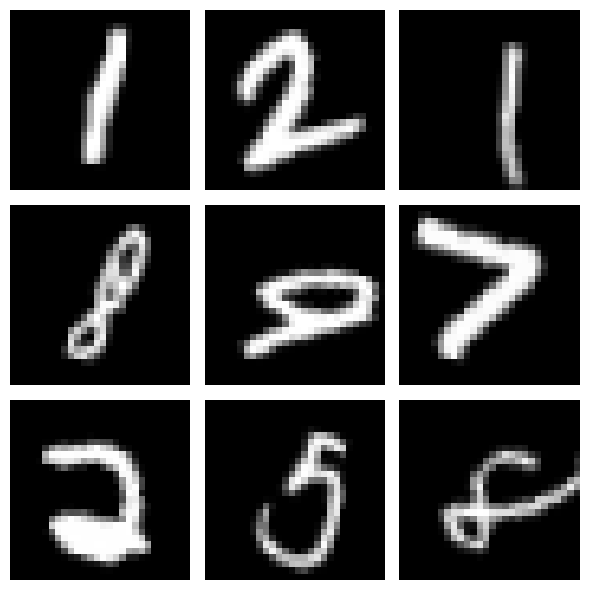

In [ ]:
# Prendre un lot d'images pour l'exemple
example_batch = next(datagen.flow(train_images, train_labels, batch_size=9))

# Définir la figure pour l'affichage
fig, axes = plt.subplots(3, 3, figsize=(6,6))
axes = axes.flatten()

for img, ax in zip(example_batch[0], axes):
    # Les images sont normalisées, donc on remet les valeurs de pixels entre 0 et 255 pour l'affichage
    ax.imshow(np.clip(img * 255, 0, 255).astype('uint8'), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

Affichage du loss et accuracy après l'améliorations du modèle

In [ ]:
# Évaluation du modèle
test_loss, test_accuracy = model_mnist.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_accuracy)
print('Test Loss: ',test_loss)

313/313 - 5s - loss: 0.0421 - accuracy: 0.9862 - 5s/epoch - 15ms/step
Test accuracy: 0.9861999750137329
Test Loss:  0.04212811589241028


In [ ]:
# Prédictions du modèle sur l'ensemble de test
predictions = model_mnist.predict(test_images)

# Conversion des prédictions en étiquettes prédites et les étiquettes réelles
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
confusion_mtx = confusion_matrix(actual_labels, predicted_labels)
print("Matrice de confusion :")
print(confusion_mtx)

# Calculer la précision
precision = precision_score(actual_labels, predicted_labels, average='weighted')
print("Précision :", precision)

# Calculer le rappel
recall = recall_score(actual_labels, predicted_labels, average='weighted')
print("Rappel :", recall)

# Calcul du score F1
f1 = f1_score(actual_labels,predicted_labels, average='weighted')
print("Score F1 :", f1)

313/313 [==============================] - 4s 11ms/step
Matrice de confusion :
[[ 976    0    2    0    0    0    2    0    0    0]
 [   0 1125    3    2    0    1    2    2    0    0]
 [   1    0 1025    0    0    0    0    5    1    0]
 [   0    0    2 1001    0    3    0    3    1    0]
 [   0    0    0    0  959    0    5    0    1   17]
 [   0    0    0    6    0  879    6    0    1    0]
 [   1    3    0    0    1    1  950    0    2    0]
 [   0    3   23    1    6    0    0  991    1    3]
 [   0    0    5    0    2    0    0    0  964    3]
 [   1    0    0    0    4    3    0    5    4  992]]
Précision : 0.9862649422230179
Rappel : 0.9862
Score F1 : 0.9861968850945106


#**Comparaison de différentes architectures de CNN.**


**LENET-5**

In [ ]:
#Modèle LENET-5
# Construction du modèle LeNet-5 pour MNIST
model_lenet = Sequential()

# Première couche de convolution et de pooling
model_lenet.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Deuxième couche de convolution et de pooling
model_lenet.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Aplatir les données pour la couche dense
model_lenet.add(Flatten())

# Première couche dense
model_lenet.add(Dense(120, activation='relu'))

# Deuxième couche dense
model_lenet.add(Dense(84, activation='relu'))

# Couche de sortie
model_lenet.add(Dense(10, activation='softmax'))



# Compiler le modèle
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model_lenet.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Visualiser l'architecture du modèle
model_lenet.summary()

# Calcul de l'accuracy sur l'ensemble de test
test_loss, test_accuracy = model_lenet.evaluate(test_images, test_labels)

print('Accuracy on test dataset:', test_accuracy)

# Effectuer des prédictions sur l'ensemble de test
predictions = model_lenet.predict(test_images)




Epoch 1/10
750/750 [==============================] - 23s 29ms/step - loss: 0.3380 - accuracy: 0.9000 - val_loss: 0.1068 - val_accuracy: 0.9672
Epoch 2/10
750/750 [==============================] - 23s 30ms/step - loss: 0.1028 - accuracy: 0.9691 - val_loss: 0.0644 - val_accuracy: 0.9783
Epoch 3/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0596 - val_accuracy: 0.9794
Epoch 4/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0518 - val_accuracy: 0.9829
Epoch 5/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0461 - val_accuracy: 0.9861
Epoch 6/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0463 - val_accuracy: 0.9850
Epoch 7/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0460 - val_accuracy:

##Analyse des résultats & Comparaison



###1. **Précision**

 **net_5** : Précision maximale sur l'ensemble de test atteinte de 98.62%.

 **model_mnist** : Précision maximale sur l'ensemble de test atteinte de 98.76%.
   

###2. **Complexité du modèle**

 **net_5** : La structure précise du modèle net_5 n'a pas été décrite en détail. Cependant, les précédentes descriptions des performances suggèrent un modèle efficace.

 **model_mnist** : Il a une structure plus détaillée disponible, consistant en des couches de convolution, des couches de pooling et des couches entièrement connectées, avec un total de 44,426 paramètres. Ce qui indique un modèle assez compact et bien adapté pour le traitement d'images.


###3. **Performance et convergence**

  **net_5** : Basé sur les valeurs de perte et les mesures de précision fournies, le modèle semble avoir bien convergé et être performant sur l'ensemble de test.

  **model_mnist** : Les valeurs de précision et de perte indiquent également une excellente performance et une bonne convergence.














## Étude de quelques méthodes de visualisation

<Axes: >

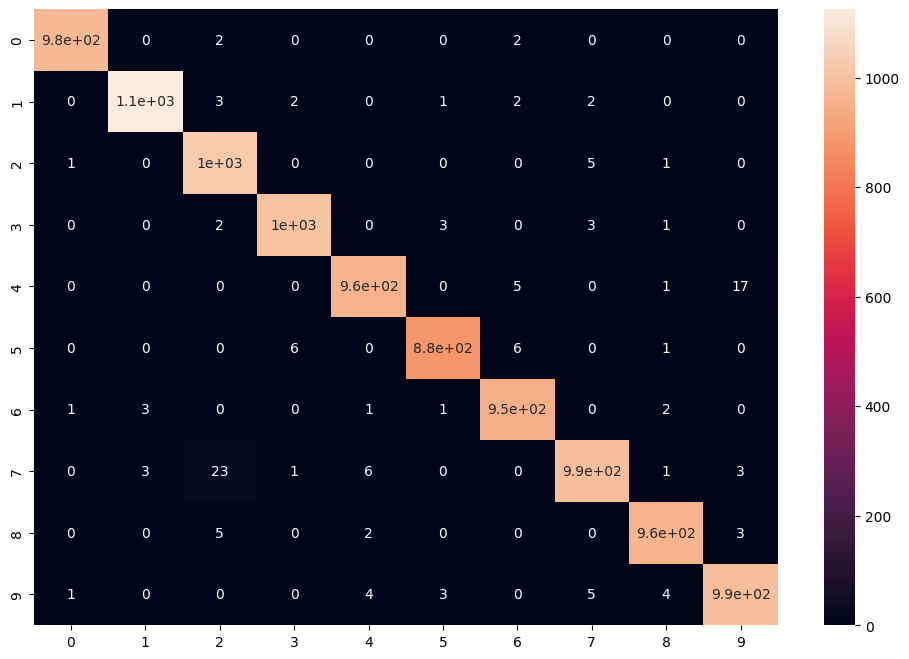

In [ ]:
plt.figure(figsize=(12,8))
#confusion_matrix(y_test, prediction)
sns.heatmap(confusion_matrix(actual_labels, predicted_labels),annot=True)

La heatmap qui représente la matrice de confusion montre que le modèle a très bien fonctionné pour chaque classe, avec des valeurs diagonales élevées indiquant un bon nombre de prédictions correctes.

Il semble y avoir très peu d'erreurs de classification entre les différentes classes.